In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms

In [ ]:
torch.manual_seed(111)

In [34]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Preparing data

In [35]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [36]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

In [37]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

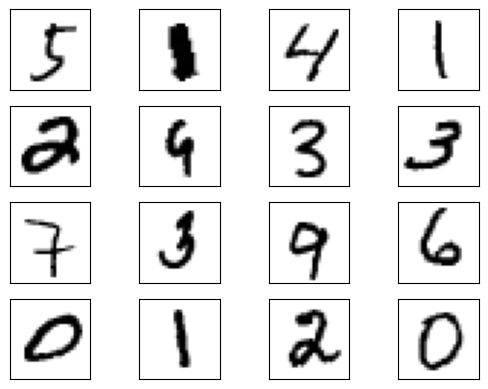

In [38]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

# Building the GAN

## Discriminator

In [39]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

In [40]:
discriminator = Discriminator().to(device=device) # type: ignore

## Generator

In [41]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device) # type: ignore

In [42]:
generator = Generator()

# Training

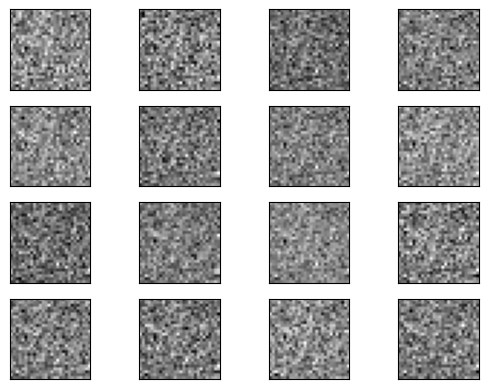

epoch=0, loss_discriminator.item()=0.558364987373352, loss_generator.item()=0.5052803754806519


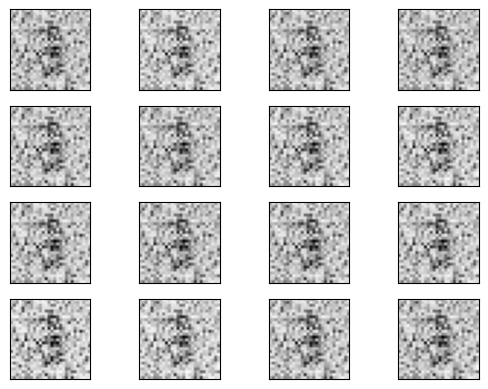

epoch=2, loss_discriminator.item()=0.04945346340537071, loss_generator.item()=5.591841697692871


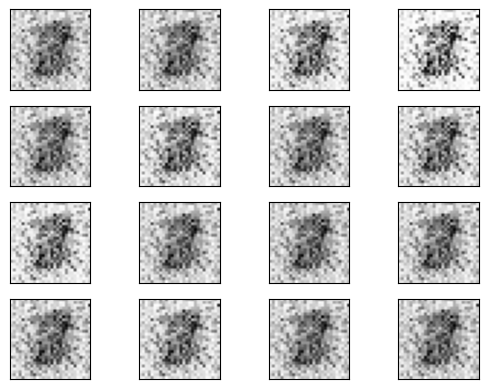

epoch=4, loss_discriminator.item()=0.13054467737674713, loss_generator.item()=4.136328220367432


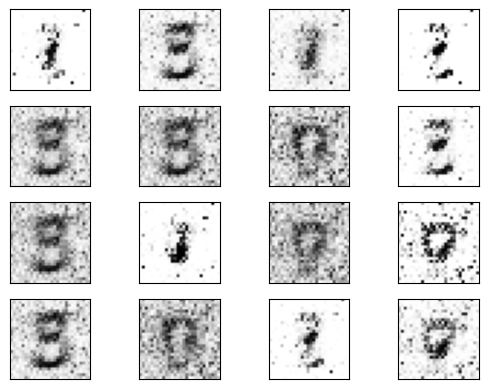

epoch=6, loss_discriminator.item()=0.17720110714435577, loss_generator.item()=3.8779242038726807


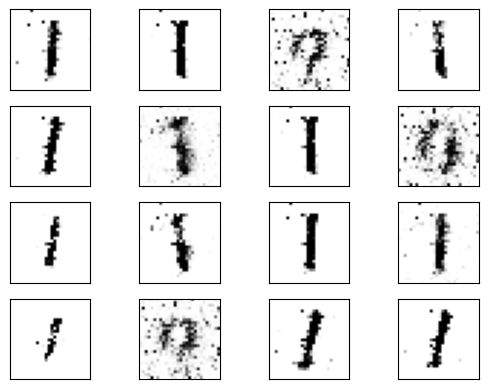

epoch=8, loss_discriminator.item()=0.28605708479881287, loss_generator.item()=2.2765467166900635


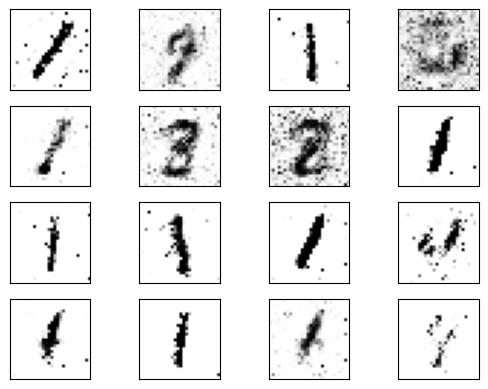

epoch=10, loss_discriminator.item()=0.31348544359207153, loss_generator.item()=1.8486993312835693


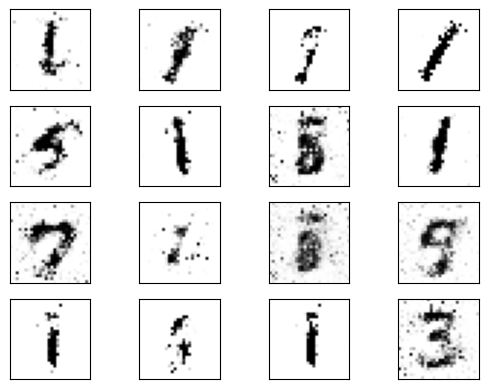

epoch=12, loss_discriminator.item()=0.47319090366363525, loss_generator.item()=1.4494415521621704


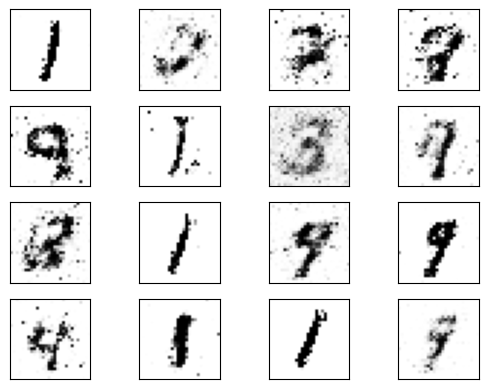

epoch=14, loss_discriminator.item()=0.38322290778160095, loss_generator.item()=1.8301819562911987


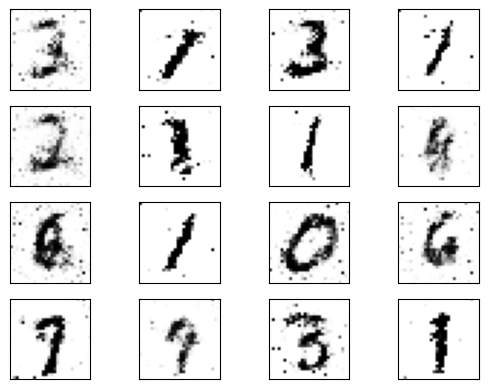

In [43]:
# Meta parameters
learning_rate = 0.0001
number_of_epochs = 16
loss_function = nn.BCELoss()

# Optimizations
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=learning_rate)

# Visualise progress
new_latent_space_samples = torch.randn(batch_size, 100).to(device=device)
new_generated_samples = generator(new_latent_space_samples)
new_generated_samples = new_generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(new_generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])
    
plt.show()

# Training loop
for epoch in range(number_of_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 2 == 0 and n == batch_size - 1:
            print(f"{epoch=}, {loss_discriminator.item()=}, {loss_generator.item()=}")

            # Visualise progress
            new_latent_space_samples = torch.randn(batch_size, 100).to(device=device)
            new_generated_samples = generator(new_latent_space_samples)
            new_generated_samples = new_generated_samples.cpu().detach()
            for i in range(16):
                ax = plt.subplot(4, 4, i + 1)
                plt.imshow(new_generated_samples[i].reshape(28, 28), cmap="gray_r")
                plt.xticks([])
                plt.yticks([])
            plt.show()

# Testing

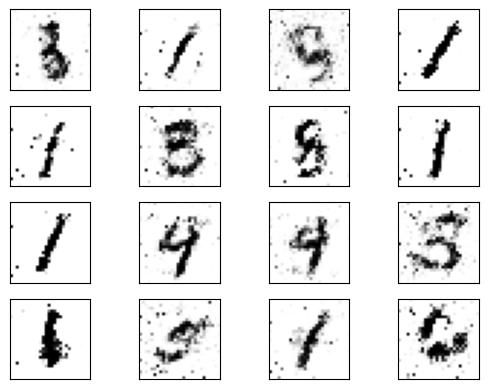

In [68]:
# Visualise progress
test_latent_space_samples = torch.randn(batch_size, 100).to(device=device)
test_generated_samples = generator(test_latent_space_samples)
test_generated_samples = test_generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(test_generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])
plt.show()